# NBACK_CLASSIFICATION BRANCH 
- 2-back classify same(1) or different(2). 
- 2 stimuli, 30 trials per episode
    - NB more than 2 stimuli makes "different" more likely. this might introduce a bias when numstim>2

In [1]:
from glob import glob as glob
import numpy as np
from nback import *

from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

/Users/abeukers/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### depth matters
- 3back+10depth=nogood
- 3back+20depth=good
- when sweeping nback keep in mind depth might interact. that is, larger nback might require more depth to perform at same level

ADAM005
0.0 0.7050538
0.05 2.3608549
0.1 0.898908
0.15 2.2449524
0.2 1.8114862
0.25 2.0773842
0.3 0.72707194
0.35 2.8683896
0.4 0.9784775
0.45 0.94617677
0.5 1.6222136
0.55 2.439255
0.6 2.5468566
0.65 1.5321398
0.7 0.0018564566
0.75 1.6119839
0.8 2.0171587
0.85 0.57761
0.9 0.39927226
0.95 1.8826916


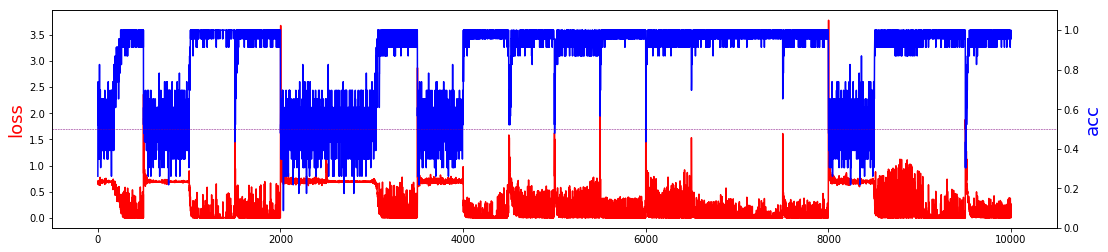

In [140]:
ML = MetaLearner(stsize=50,depth=20,nback=3)
trainer=Trainer(ML,nback=3)
train_loss,train_acc = trainer.train_loop(10000,500)
plt_loss_acc(train_loss,train_acc)

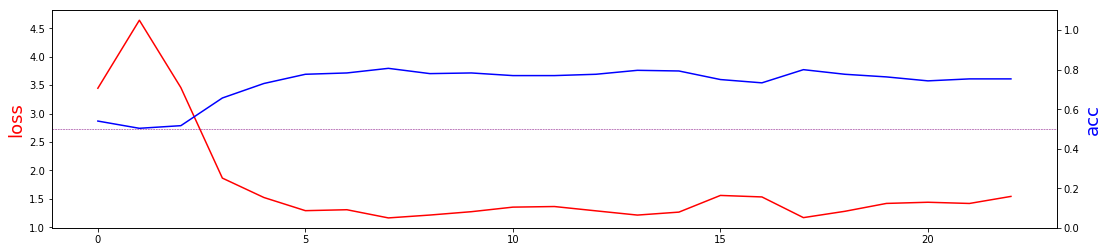

In [141]:
eval_loss,eval_acc = trainer.eval_loop(300)
mean_evalloss = np.mean(eval_loss,0)
mean_evalacc = np.mean(eval_acc,0)

def plt_loss_acc(plt_loss,plt_acc):
  plt.figure(figsize=(18,4))
  ax1 = plt.gca()
  ax1.plot(plt_loss,c='r')
  ax1.set_ylabel('loss',color='red',fontsize=18)
  ax2 = ax1.twinx()
  ax2.plot(plt_acc,c='b')
  ax2.set_ylabel('acc',color='b',fontsize=18)
  ax2.set_ylim(0,1.1)
  ax2.axhline(0.5,c='purple',ls='--',lw=.5)
  
plt_loss_acc(mean_evalloss,mean_evalacc)